<a href="https://colab.research.google.com/github/ChiaHouTan/ADS_2020_-ALT_ASS_Chia_Hou_Tan/blob/master/D00223937_Smart_Tech_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ChiaHouTan/SmartTechCa2.git

Cloning into 'SmartTechCa2'...
remote: Enumerating objects: 5946, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 5946 (delta 1), reused 3 (delta 0), pack-reused 5937
Receiving objects: 100% (5946/5946), 87.59 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (5937/5937), done.


In [2]:
!ls

sample_data  SmartTechCa2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

#git add .
#git status
#git commit -m "First Commit" then after finish everything do below
#git branch -M main
#git push -uf origin main

In [4]:
datadir = "SmartTechCa2" #data of car picture
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
print(data.head)

<bound method NDFrame.head of                                                  center  \
0     C:\Users\tanch\Downloads\simulator-windows-64\...   
1     C:\Users\tanch\Downloads\simulator-windows-64\...   
2     C:\Users\tanch\Downloads\simulator-windows-64\...   
3     C:\Users\tanch\Downloads\simulator-windows-64\...   
4     C:\Users\tanch\Downloads\simulator-windows-64\...   
...                                                 ...   
1298  C:\Users\tanch\Downloads\simulator-windows-64\...   
1299  C:\Users\tanch\Downloads\simulator-windows-64\...   
1300  C:\Users\tanch\Downloads\simulator-windows-64\...   
1301  C:\Users\tanch\Downloads\simulator-windows-64\...   
1302  C:\Users\tanch\Downloads\simulator-windows-64\...   

                                                   left  \
0      C:\Users\tanch\Downloads\simulator-windows-64...   
1      C:\Users\tanch\Downloads\simulator-windows-64...   
2      C:\Users\tanch\Downloads\simulator-windows-64...   
3      C:\Users\tanch\Dow

In [5]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
print(data.head)

<bound method NDFrame.head of                                                  center  \
0     C:\Users\tanch\Downloads\simulator-windows-64\...   
1     C:\Users\tanch\Downloads\simulator-windows-64\...   
2     C:\Users\tanch\Downloads\simulator-windows-64\...   
3     C:\Users\tanch\Downloads\simulator-windows-64\...   
4     C:\Users\tanch\Downloads\simulator-windows-64\...   
...                                                 ...   
1298  C:\Users\tanch\Downloads\simulator-windows-64\...   
1299  C:\Users\tanch\Downloads\simulator-windows-64\...   
1300  C:\Users\tanch\Downloads\simulator-windows-64\...   
1301  C:\Users\tanch\Downloads\simulator-windows-64\...   
1302  C:\Users\tanch\Downloads\simulator-windows-64\...   

                                                   left  \
0      C:\Users\tanch\Downloads\simulator-windows-64...   
1      C:\Users\tanch\Downloads\simulator-windows-64...   
2      C:\Users\tanch\Downloads\simulator-windows-64...   
3      C:\Users\tanch\Dow

In [6]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [7]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)


In [8]:
print(data.head)

<bound method NDFrame.head of                                   center                              left  \
0     center_2024_01_10_15_14_02_120.jpg  left_2024_01_10_15_14_02_120.jpg   
1     center_2024_01_10_15_14_02_223.jpg  left_2024_01_10_15_14_02_223.jpg   
2     center_2024_01_10_15_14_02_325.jpg  left_2024_01_10_15_14_02_325.jpg   
3     center_2024_01_10_15_14_02_427.jpg  left_2024_01_10_15_14_02_427.jpg   
4     center_2024_01_10_15_14_02_529.jpg  left_2024_01_10_15_14_02_529.jpg   
...                                  ...                               ...   
1298  center_2024_01_10_15_16_16_758.jpg  left_2024_01_10_15_16_16_758.jpg   
1299  center_2024_01_10_15_16_16_859.jpg  left_2024_01_10_15_16_16_859.jpg   
1300  center_2024_01_10_15_16_16_963.jpg  left_2024_01_10_15_16_16_963.jpg   
1301  center_2024_01_10_15_16_17_065.jpg  left_2024_01_10_15_16_17_065.jpg   
1302  center_2024_01_10_15_16_17_168.jpg  left_2024_01_10_15_16_17_168.jpg   

                                 

In [9]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-7.6782610e-01 -6.9795662e-01 -6.2808714e-01 -5.5821766e-01
 -4.8834818e-01 -4.1847870e-01 -3.4860922e-01 -2.7873974e-01
 -2.0887026e-01 -1.3900078e-01 -6.9131300e-02  7.3818000e-04
  7.0607660e-02  1.4047714e-01  2.1034662e-01  2.8021610e-01
  3.5008558e-01  4.1995506e-01  4.8982454e-01  5.5969402e-01
  6.2956350e-01  6.9943298e-01  7.6930246e-01  8.3917194e-01
  9.0904142e-01  9.7891090e-01]


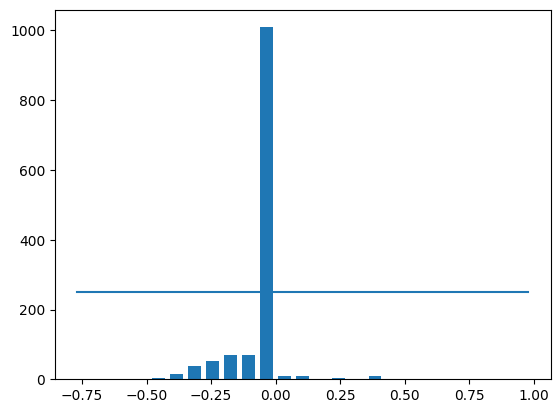

In [10]:
centre = (bins[:-1] + bins[1:])*0.5
samples_per_bin = 250
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [11]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if bins[j] <= data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

In [12]:
print("Removed: ", len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print("Remaining: ", len(data))

Removed:  759
Remaining:  544


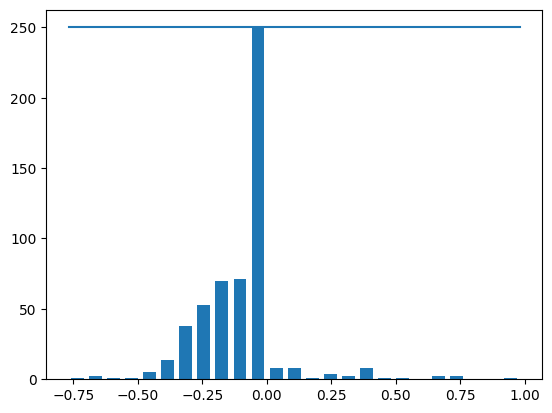

In [13]:
hist, bins = np.histogram(data['steering'], num_bins)
plt.bar(centre, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [14]:
# Training and Validation split
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [15]:
image_paths, steerings = load_img_steering(datadir+'/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

In [16]:
print(f"Traing samples {len(X_train)}, validation samples {len(X_valid)}")

Traing samples 435, validation samples 109


Text(0.5, 1.0, 'Validation set')

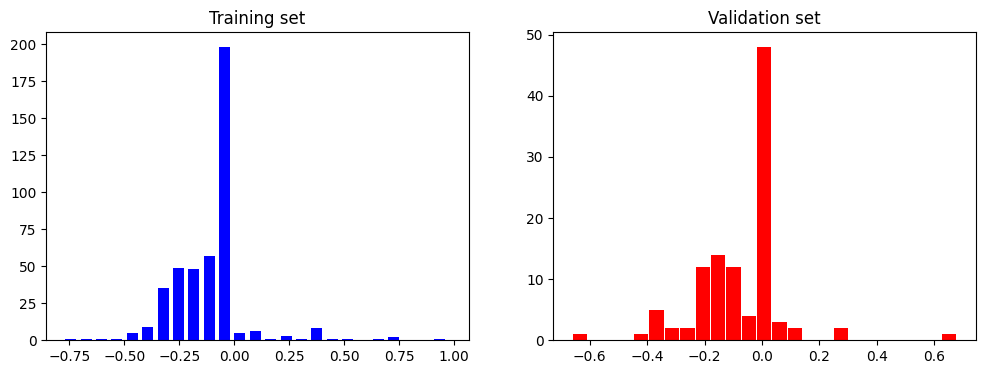

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins = num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [18]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

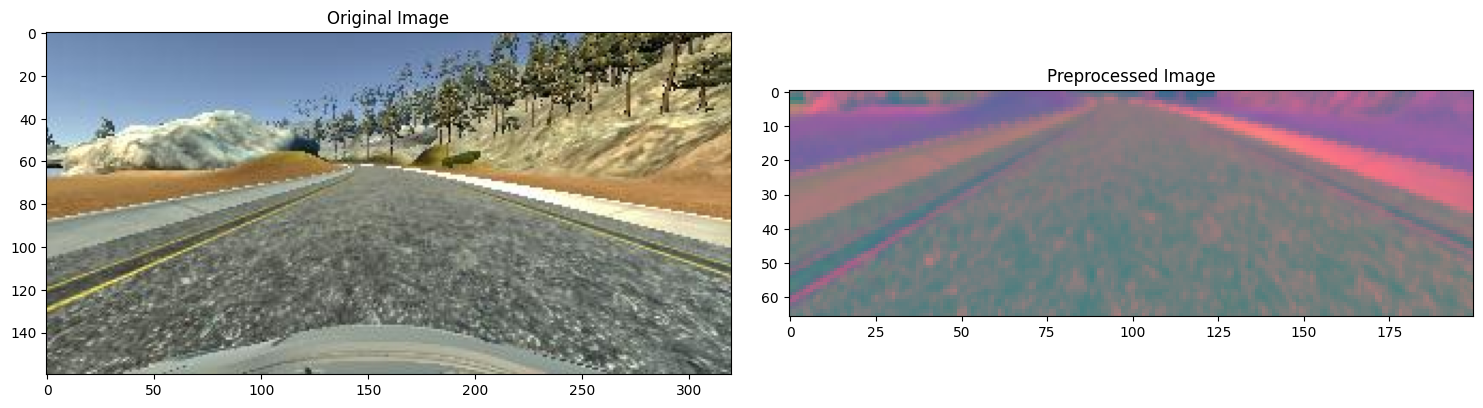

In [19]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axes = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")